# | Aeroelasticity PIA | 

V4-V6

Students:

Gabriel Jerome Vargas Moya  | 2077615

Martín Eduardo Salazar Leal | 2077450

Antonio Martínez Valero     | 1957324



## Statement

Consider the data provided by the following truck. Answer the provided questions. Validate and justify your reasonings and aasumptions using sketches, drawings, equations, etc. In all the questions, provide a valid discussion of the results and comparison if applicable.


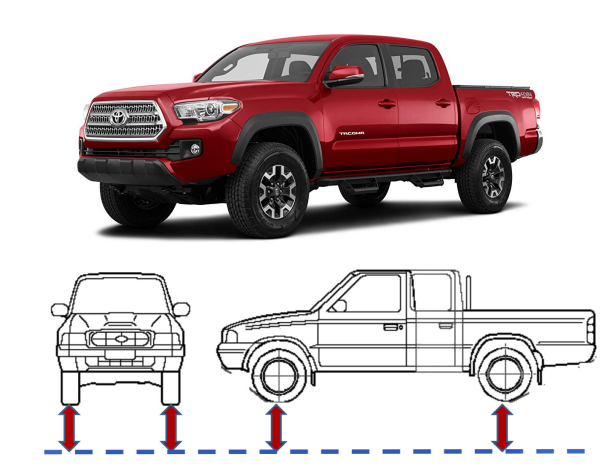


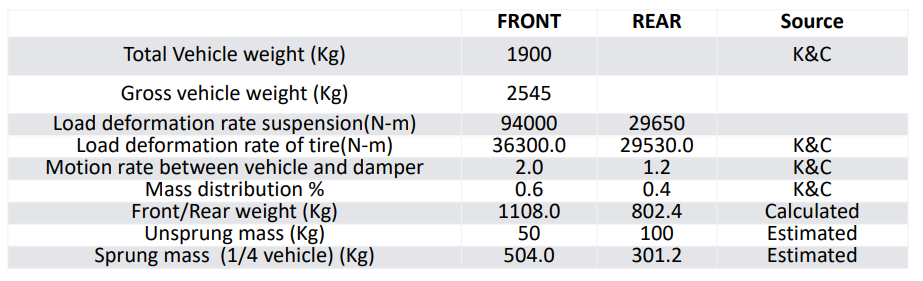

## 1. Estimate the equivalent fundamental natural frequency for the vehicle without load and the vehicle fully loaded. Assume an initial (reasonable) deflection for the vehicle SDOF equivalent model.

### A. Analysis

The initial truck system that was given is the following; and to estimate a preliminar natural frequency it’s important the simplification of the truck as a mass-spring system, in this case the tires are going to be neglected since first we want an approximation of the model.


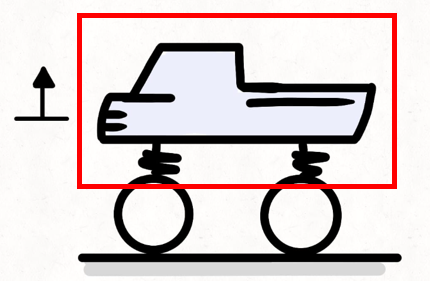

 Now considering just the total mass of the truck plus its suspensions the following system is gotten.

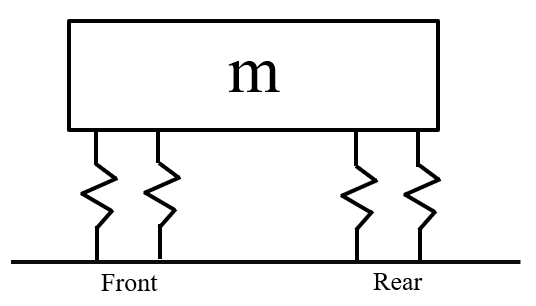

Knowing from the table of properties of the truck it is already known that the front suspension has an deformation rate of 94,000 N/m while the rear suspensions have 29,650 N/m. As the system is in parallel an aproximated value for an equivalent deformation rate of suspensions will be given by:


$k_{eq} = 2*k_{Front} + 2*k_{Rear}$

$k_{eq} = 2*94kN/m + 2*29.65kN/m$

$k_{eq} = 247.3 kN/m$


Now the simplified system which it will be worked on is the following system:


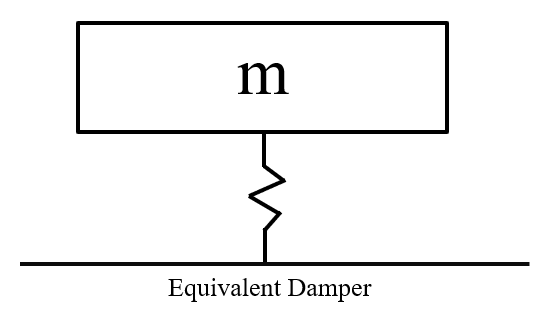

### B. Calculations

With the simplification of the system now it is possible to calculte an approximation fo the natural frequency that is given by:


$\omega_n = \sqrt{\frac{k}{m}}$

$\omega_{nEmpty} = \sqrt{\frac{k}{m_{Empty}}}$

$\omega_{nFull} = \sqrt{\frac{k}{m_{Full}}}$


$\omega_{nEmpty} = \sqrt{\frac{247.3kN/m}{1900kg}} = 11.4 rad/s$

$\omega_{nFull} = \sqrt{\frac{247.3kN/m}{2545kg}} = 9.587 rad/s$


The values that were chosen as initial conditions for teh system are: $x_0 = 0.02m$, $\dot{x_0} = 0 m/s$. To calculate the amplitude of the system the following equation is used (since the damping isnt being considered):

$C = \frac{\sqrt{x_0^2\omega_n^2 + \dot{x_0^2}}}{\omega_n}$

$C_{Empty} = \frac{\sqrt{0.02m^2*(11.4rad/s)^2 + 0}}{11.4rad/s} = 0.02m$

$C_{Full} = \frac{\sqrt{0.02m^2*(9.587𝑟𝑎𝑑/𝑠)^2 + 0}}{9.587𝑟𝑎𝑑/𝑠} = 0.02m$


As for the phase of the system it is given by:


$\phi = Tan^{-1} (\frac{\omega_nx_0}{\dot{x_0}})$

$\phi_{Empty}= Tan^{-1} (\frac{11.4rad/s*0.02m}{0}) = 0$

$\phi_{Full} = Tan^{-1} (\frac{9.587rad/s*0.02m}{0}) = 0$

## 2. Plot the free response for the cases studied in 1.


For the plots of the free response cases the following code will be used:

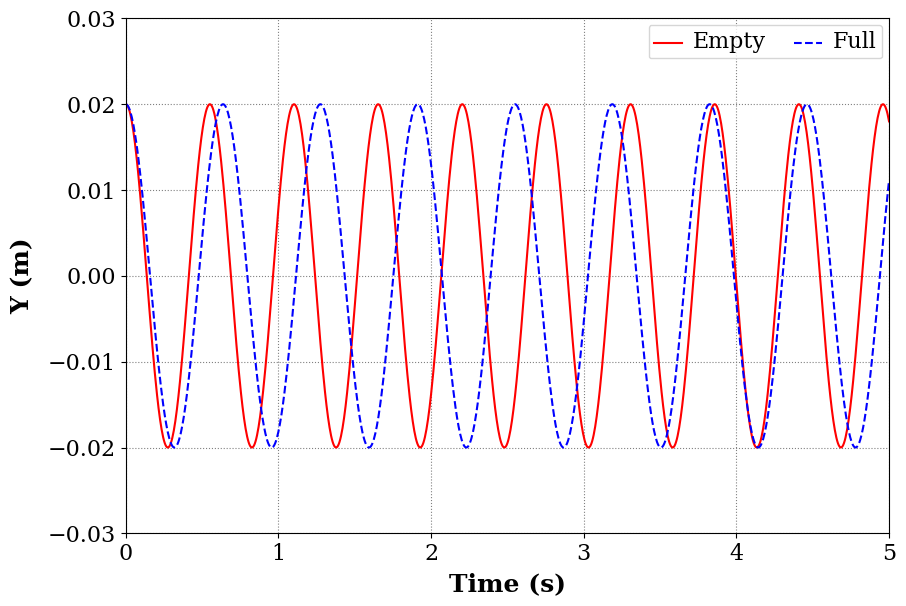

In [4]:
import numpy as np    # numpy is the main module for numeric calculations, which will be called as np

#%matplotlib inline

# Import the plotting module 
import matplotlib.pyplot as plt

# Define system Parameters
m1 = 1900.0                  # kg
m2 = 2545.0                  # kg
wn1 = 11.4        # Natural Frequency (rad/s)
wn2 = 9.857       # Natural Frequency (rad/s)
k = 247300   # N/m 

# Set up simulation parameters
t = np.linspace(0, 5.0, 1001)          

# Define the initial conditions for displacement x(0) and velocity x_dot(0)
x0 = np.array([0.02, 0.0])


# Calculate displacement x(t) no damping
x1 = x0[1]/wn1*np.sin(wn1*t)+x0[0]*np.cos(wn1*t)
x2 = x0[1]/wn2*np.sin(wn2*t)+x0[0]*np.cos(wn2*t)


# Plot the results

# Change the size of plot
fig = plt.figure(figsize=(9,6))

# Get current axes using gca
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

# Tweak spacing to prevent clipping of labels
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Plot grid can be activated and modified
ax.grid(True,linestyle=':',color='0.5')
ax.set_axisbelow(True)

# Define axis labels
plt.xlabel('Time (s)',family='serif',fontsize=18,weight='bold',labelpad=5)
plt.ylabel('Y (m)',family='serif',fontsize=18,weight='bold',labelpad=10)

# Plot with different line styles and add labels

plt.plot(t, x1, color="red", linewidth=1.5, linestyle='-', label=r'Empty')
plt.plot(t, x2, color="blue", linewidth=1.5, linestyle='--', label=r'Full')

# plot the decay envelope
#plt.plot(t, decay_env, linewidth=1.0, linestyle = '--', color = "red")
#plt.plot(t, -decay_env, linewidth=1.0, linestyle = '--', color = "red")

# Set axis limits
plt.xlim(0,5.0)
plt.ylim(-0.03,0.03)

# Add the legend calling the command, specify position and columns
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=16)

# Adjust the page layout to fill the page using the new tight_layout command
plt.tight_layout(pad=0.5)

### Discussion

It is possible to observe that since the system didnt had an initial velocity the amplitude and phase of the system remains the same as the value of $x_0$, and in both systems the amplitude is the same, the only thing that changes is the frequency, since the full loaded truck has a lower frequency the graph looks a bit shifted from the empy truck, however it is possible to observe how trhough time the empy truck fulfill more cycles.

## 3. Third Point

Investigate the effect of damping in the previous case. Assume three damping cases from the measured damping (a very low value of damping, a high value of damping and a nominal value). 


### Analysis Of A Damped Ssytem


For the analysis of the system assuming damping it is important to update the simplified model by the following diagram:

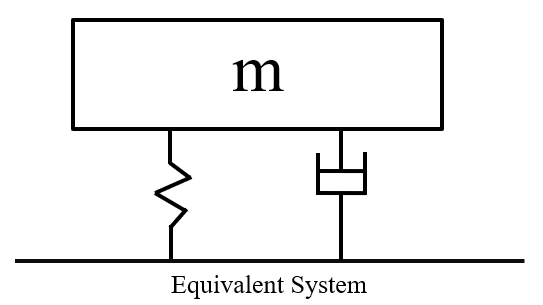

### Analysis For Empty Truck 

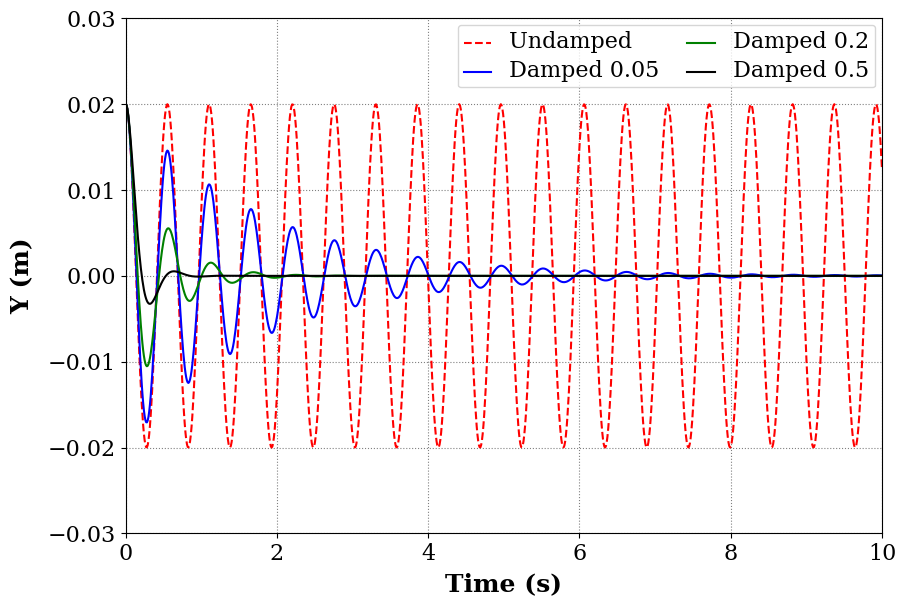

In [6]:
import numpy as np    # numpy is the main module for numeric calculations, which will be called as np

#%matplotlib inline

# Import the plotting module 
import matplotlib.pyplot as plt

# Define system Parameters
m1 = 1900.0                  # kg
m2 = 2545.0                  # kg
wn1 = 11.4        # Natural Frequency (rad/s)
wn2 = 9.857       # Natural Frequency (rad/s)
k = 247300   # N/m 

# Set up simulation parameters
t = np.linspace(0, 10.0, 1001)          

# Define the initial conditions for displacement x(0) and velocity x_dot(0)
x0 = np.array([0.02, 0.0])

#Define DAMPING
z = 0.05                 # Viscous damping ratio
c = 2*z*wn1*m1              # Damping constant (N/(m/s))
wd = wn1*np.sqrt(1 - z**2) # Damped natural frequency (rad/s)

z2 = 0.2                   # Viscous damping ratio
c2 = 2*z2*wn1*m1              # Damping constant (N/(m/s))
wd2 = wn1*np.sqrt(1 - z2**2) # Damped natural frequency (rad/s)

z3 = 0.5                  # Viscous damping ratio
c3 = 2*z3*wn1*m1              # Damping constant (N/(m/s))
wd3 = wn1*np.sqrt(1 - z3**2) # Damped natural frequency (rad/s)


x = x0[1]/wn1*np.sin(wn1*t)+x0[0]*np.cos(wn1*t)


# Calculate displacement x(t) WITH damping
x_dam = np.exp(-z*wn1*t)*(x0[0]*np.cos(wd*t) + (z*wn1*x0[0] + x0[1])/wd * np.sin(wd*t))
x_dam2 = np.exp(-z2*wn1*t)*(x0[0]*np.cos(wd2*t) + (z2*wn1*x0[0] + x0[1])/wd2 * np.sin(wd2*t))
x_dam3 = np.exp(-z3*wn1*t)*(x0[0]*np.cos(wd3*t) + (z3*wn1*x0[0] + x0[1])/wd3 * np.sin(wd3*t))

# Calculate amplitude and exponential decay
amp = np.sqrt(x0[0]**2 + ((z*wn1*x0[0] + x0[1])/wd)**2)
phase = np.arctan((x0[0]*wd)/(x0[1]+z*wn1*x0[0])) 
decay_env = amp * np.exp(-z*wn1*t)

x_dec = decay_env * np.sin(wd*t+phase)

# Plot the results

# Change the size of plot
fig = plt.figure(figsize=(9,6))

# Get current axes using gca
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

# Tweak spacing to prevent clipping of labels
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Plot grid can be activated and modified
ax.grid(True,linestyle=':',color='0.5')
ax.set_axisbelow(True)

# Define axis labels
plt.xlabel('Time (s)',family='serif',fontsize=18,weight='bold',labelpad=5)
plt.ylabel('Y (m)',family='serif',fontsize=18,weight='bold',labelpad=10)

# Plot with different line styles and add labels

plt.plot(t, x, color="red", linewidth=1.5, linestyle='--', label=r' Undamped')
plt.plot(t, x_dam, color="blue", linewidth=1.5, linestyle='-', label=r' Damped 0.05')
plt.plot(t, x_dam2, color="green", linewidth=1.5, linestyle='-', label=r' Damped 0.2')
plt.plot(t, x_dam3, color="black", linewidth=1.5, linestyle='-', label=r' Damped 0.5')
# plot the decay envelope
#plt.plot(t, decay_env, linewidth=1.0, linestyle = '--', color = "red")
#plt.plot(t, -decay_env, linewidth=1.0, linestyle = '--', color = "red")

# Set axis limits
plt.xlim(0,10.0)
plt.ylim(-0.03,0.03)

# Add the legend calling the command, specify position and columns
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=16)

# Adjust the page layout to fill the page using the new tight_layout command
plt.tight_layout(pad=0.5)

### Analysis For Full Truck 

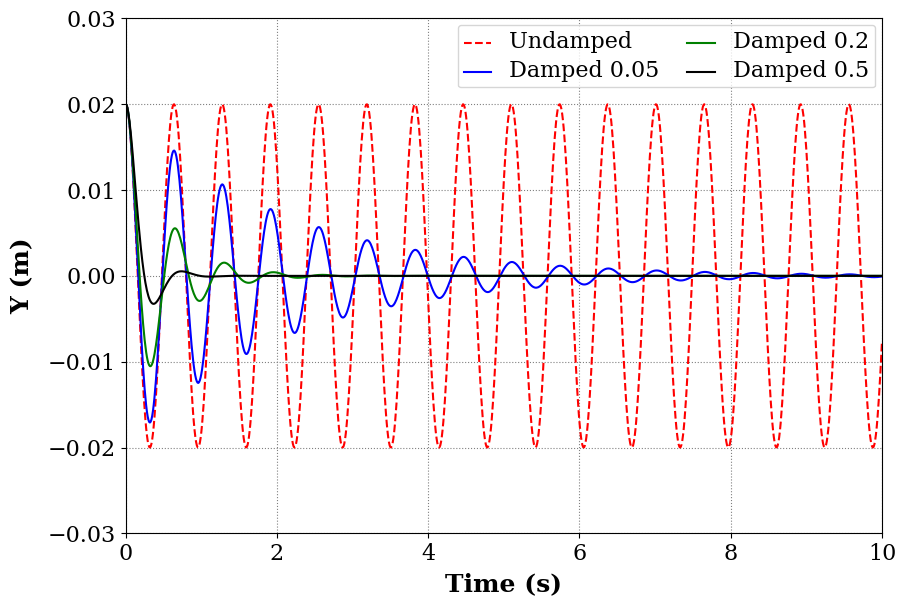

In [7]:
import numpy as np    # numpy is the main module for numeric calculations, which will be called as np

#%matplotlib inline

# Import the plotting module 
import matplotlib.pyplot as plt

# Define system Parameters
m1 = 2545.0                  # kg
wn1 = 9.857       # Natural Frequency (rad/s)
k = 247300   # N/m 

# Set up simulation parameters
t = np.linspace(0, 10.0, 1001)          

# Define the initial conditions for displacement x(0) and velocity x_dot(0)
x0 = np.array([0.02, 0.0])

#Define DAMPING
z = 0.05                 # Viscous damping ratio
c = 2*z*wn1*m1              # Damping constant (N/(m/s))
wd = wn1*np.sqrt(1 - z**2) # Damped natural frequency (rad/s)

z2 = 0.2                   # Viscous damping ratio
c2 = 2*z2*wn1*m1              # Damping constant (N/(m/s))
wd2 = wn1*np.sqrt(1 - z2**2) # Damped natural frequency (rad/s)

z3 = 0.5                  # Viscous damping ratio
c3 = 2*z3*wn1*m1              # Damping constant (N/(m/s))
wd3 = wn1*np.sqrt(1 - z3**2) # Damped natural frequency (rad/s)


x = x0[1]/wn1*np.sin(wn1*t)+x0[0]*np.cos(wn1*t)


# Calculate displacement x(t) WITH damping
x_dam = np.exp(-z*wn1*t)*(x0[0]*np.cos(wd*t) + (z*wn1*x0[0] + x0[1])/wd * np.sin(wd*t))
x_dam2 = np.exp(-z2*wn1*t)*(x0[0]*np.cos(wd2*t) + (z2*wn1*x0[0] + x0[1])/wd2 * np.sin(wd2*t))
x_dam3 = np.exp(-z3*wn1*t)*(x0[0]*np.cos(wd3*t) + (z3*wn1*x0[0] + x0[1])/wd3 * np.sin(wd3*t))

# Calculate amplitude and exponential decay
amp = np.sqrt(x0[0]**2 + ((z*wn1*x0[0] + x0[1])/wd)**2)
phase = np.arctan((x0[0]*wd)/(x0[1]+z*wn1*x0[0])) 
decay_env = amp * np.exp(-z*wn1*t)

x_dec = decay_env * np.sin(wd*t+phase)

# Plot the results

# Change the size of plot
fig = plt.figure(figsize=(9,6))

# Get current axes using gca
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

# Tweak spacing to prevent clipping of labels
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Plot grid can be activated and modified
ax.grid(True,linestyle=':',color='0.5')
ax.set_axisbelow(True)

# Define axis labels
plt.xlabel('Time (s)',family='serif',fontsize=18,weight='bold',labelpad=5)
plt.ylabel('Y (m)',family='serif',fontsize=18,weight='bold',labelpad=10)

# Plot with different line styles and add labels

plt.plot(t, x, color="red", linewidth=1.5, linestyle='--', label=r' Undamped')
plt.plot(t, x_dam, color="blue", linewidth=1.5, linestyle='-', label=r' Damped 0.05')
plt.plot(t, x_dam2, color="green", linewidth=1.5, linestyle='-', label=r' Damped 0.2')
plt.plot(t, x_dam3, color="black", linewidth=1.5, linestyle='-', label=r' Damped 0.5')
# plot the decay envelope
#plt.plot(t, decay_env, linewidth=1.0, linestyle = '--', color = "red")
#plt.plot(t, -decay_env, linewidth=1.0, linestyle = '--', color = "red")

# Set axis limits
plt.xlim(0,10.0)
plt.ylim(-0.03,0.03)

# Add the legend calling the command, specify position and columns
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=16)

# Adjust the page layout to fill the page using the new tight_layout command
plt.tight_layout(pad=0.5)

## 4. Forth Point

Considering the values assumed in point 3 (mass and spring), plot the magnitude and phase plots of the FRF assuming a SDOF model under harmonic forcing function. Express the system equations and the procedure to obtain the FRF.

[None, None, None, None, None, None, None, None, None]

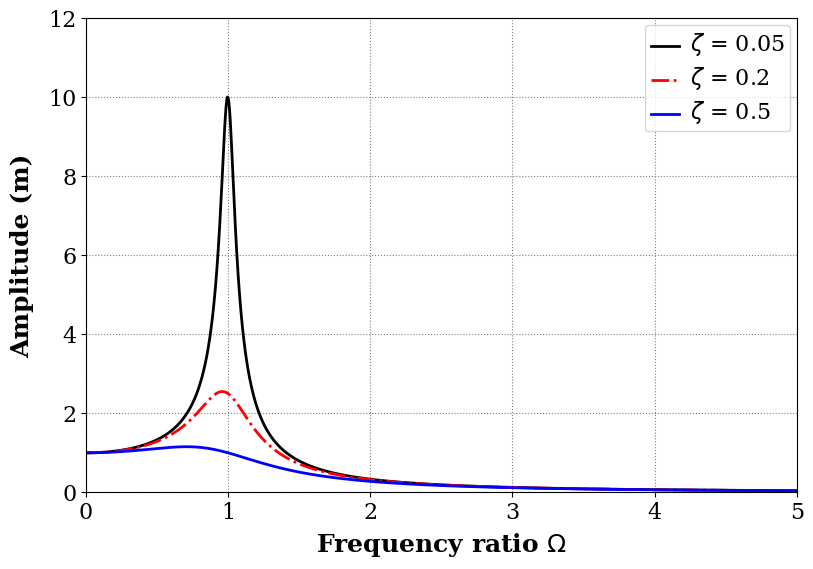

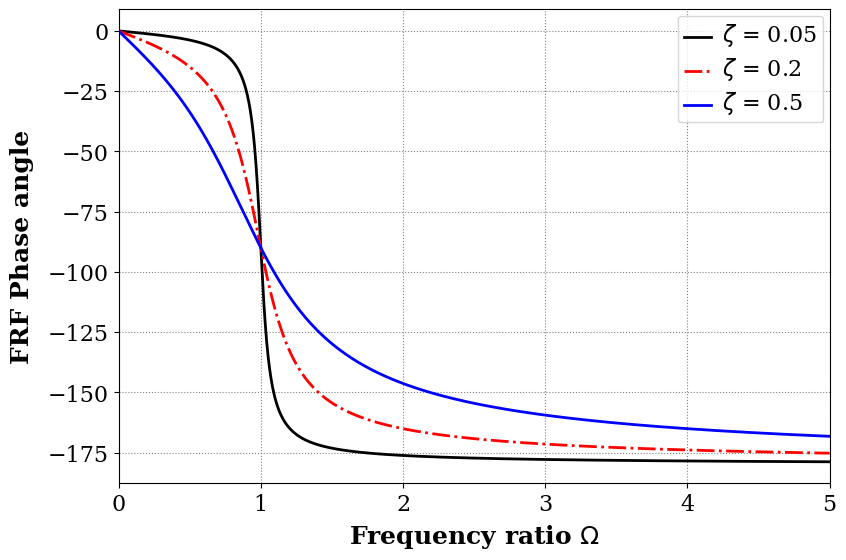

In [8]:
import numpy as np    # numpy is the main module for numeric calculations, which will be called as np


# Import the plotting module 
import matplotlib.pyplot as plt


# Set up parameters
wr = np.linspace(0,5,1000)          # Frequency ratio range for FRF plot

zeta = 0.05
FRF_mag_01 = np.abs(1/(1-wr**2 + 1j*2*zeta*wr))  # Correction for getting X (amplitude)
FRF_phase_01 = np.angle(1/(1-wr**2 + 1j*2*zeta*wr))* 180/np.pi

zeta = 0.2
FRF_mag_02 = np.abs(1/(1-wr**2 + 1j*2*zeta*wr))  # Correction for getting X (amplitude)
FRF_phase_02 = np.angle(1/(1-wr**2 + 1j*2*zeta*wr))* 180/np.pi

zeta = 0.5
FRF_mag_03 = np.abs(1/(1-wr**2 + 1j*2*zeta*wr)) # Correction for getting X (amplitude)
FRF_phase_03 = np.angle(1/(1-wr**2 + 1j*2*zeta*wr))* 180/np.pi


# Plot the magnitude

# Change the size of plot
fig = plt.figure(figsize=(9,6))

# Get current axes using gca
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

# Tweak spacing to prevent clipping of labels
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Plot grid can be activated and modified
ax.grid(True,linestyle=':',color='0.5')
ax.set_axisbelow(True)

# Define axis labels
plt.xlabel('Frequency ratio $\Omega$',family='serif',fontsize=18,weight='bold',labelpad=5)
plt.ylabel('Amplitude (m)',family='serif',fontsize=18,weight='bold',labelpad=10)


plt.plot(wr, FRF_mag_01,color="black", linewidth=2, linestyle = '-', label=r'$\zeta$ = 0.05')
plt.plot(wr, FRF_mag_02, color="red",linewidth=2, linestyle = '-.', label=r'$\zeta$ = 0.2')
plt.plot(wr, FRF_mag_03, color="blue",linewidth=2, linestyle = '-', label=r'$\zeta$ = 0.5')


plt.xlim(0,5)
plt.ylim(0,12.0)

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)


# MAGNITUDE


# Plot the phase

# Change the size of plot
fig = plt.figure(figsize=(9,6))

# Get current axes using gca
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

# Tweak spacing to prevent clipping of labels
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Plot grid can be activated and modified
ax.grid(True,linestyle=':',color='0.5')
ax.set_axisbelow(True)

# Define axis labels
plt.xlabel('Frequency ratio $\Omega$',family='serif',fontsize=18,weight='bold',labelpad=5)
plt.ylabel('FRF Phase angle',family='serif',fontsize=18,weight='bold',labelpad=10)

plt.plot(wr, FRF_phase_01, color="black",linewidth=2, linestyle = '-', label=r'$\zeta$ = 0.05')
plt.plot(wr, FRF_phase_02, color="red",linewidth=2, linestyle = '-.', label=r'$\zeta$ = 0.2')
plt.plot(wr, FRF_phase_03, color="blue",linewidth=2, linestyle = '-', label=r'$\zeta$ = 0.5')



plt.xlim(0,5)

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)
